# Image crop

In [1]:
import cv2
import numpy as np
import glob
import os
from shutil import copyfile
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict

img_path = "eyenet_0819/Age-related-macular-degeneration/drusen/drusen-0.jpg"
imgs = glob.glob('eyenet_0819/Age-related-macular-degeneration/drusen/*.jpg')

def classify(img_path, gradient, lb, ub):
    
    img = Image.open(img_path)
    img = np.asarray(img)

    vcut = int(img.shape[1]/2)
    hcut = int(img.shape[0]/2)

    img = np.mean(img,axis=2)
    indices = np.argwhere(img>=gradient)
    img[indices[:,0], indices[:,1]] = 200
    
    vline = np.mean(img[:,vcut-10:vcut+10],axis=1)
    plt.imshow(img)
    hline = np.mean(img[hcut-10:hcut+10,:],axis=0)
    vnum = len(vline[vline==200])
    hnum = len(hline[hline==200])
    
    if vnum <= ub and hnum <= lb:
        cls = 4
    elif vnum >= ub and hnum <= lb:
        cls = 6
    elif vnum >= ub and hnum >= ub:
        cls = 1
    elif vnum <= lb and  hnum >= ub:
        cls = 2
    else: cls = 1
    return cls

6

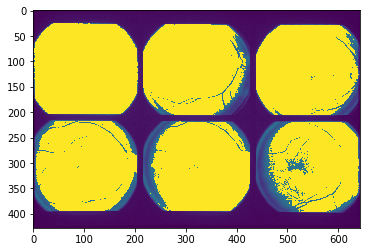

In [2]:
img_path = "eyenet_0819/Age-related-macular-degeneration/drusen/drusen-17.jpg"
classify(img_path, 80, 50, 100)

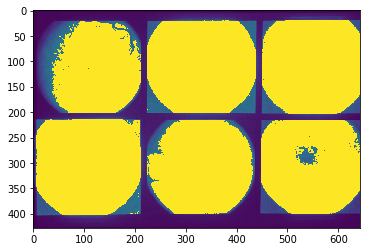

In [3]:
def modify(x):
    return int(x.split('.')[0].split('-')[1])

groups = {modify(img.split('/')[-1]) : classify(img, 80, 10, 100) for img in imgs}
groups_new = sorted(groups.items(), key= lambda x:x[1])

In [57]:
def process(x):
    try:
        img = Image.open("eyenet_0819/Age-related-macular-degeneration/drusen/drusen-{}.jpg".format(x))
    except:
        img = None
    return (img, x)

#Visualization
def visualize(gen):
    size = int(np.sqrt(len(gen)))+1
    plt.figure(num='eye',figsize=(20,20))

    for i,(img,x) in enumerate(gen):
        plt.subplot(size,size,i+1)
        plt.title('img'+str(x))
        plt.imshow(img)
        plt.axis('off')
    plt.show()

cls_group = {}
final_gen = {}

# Get all groups data
for i in range(1,7):
    cls_group.setdefault(i,[])
for img, cls in groups_new:
    cls_group[cls].append(img)

In [97]:
# Get specific group data
clss = 6
gen = [process(i) for i in cls_group[clss] if process(i)[0] != None]

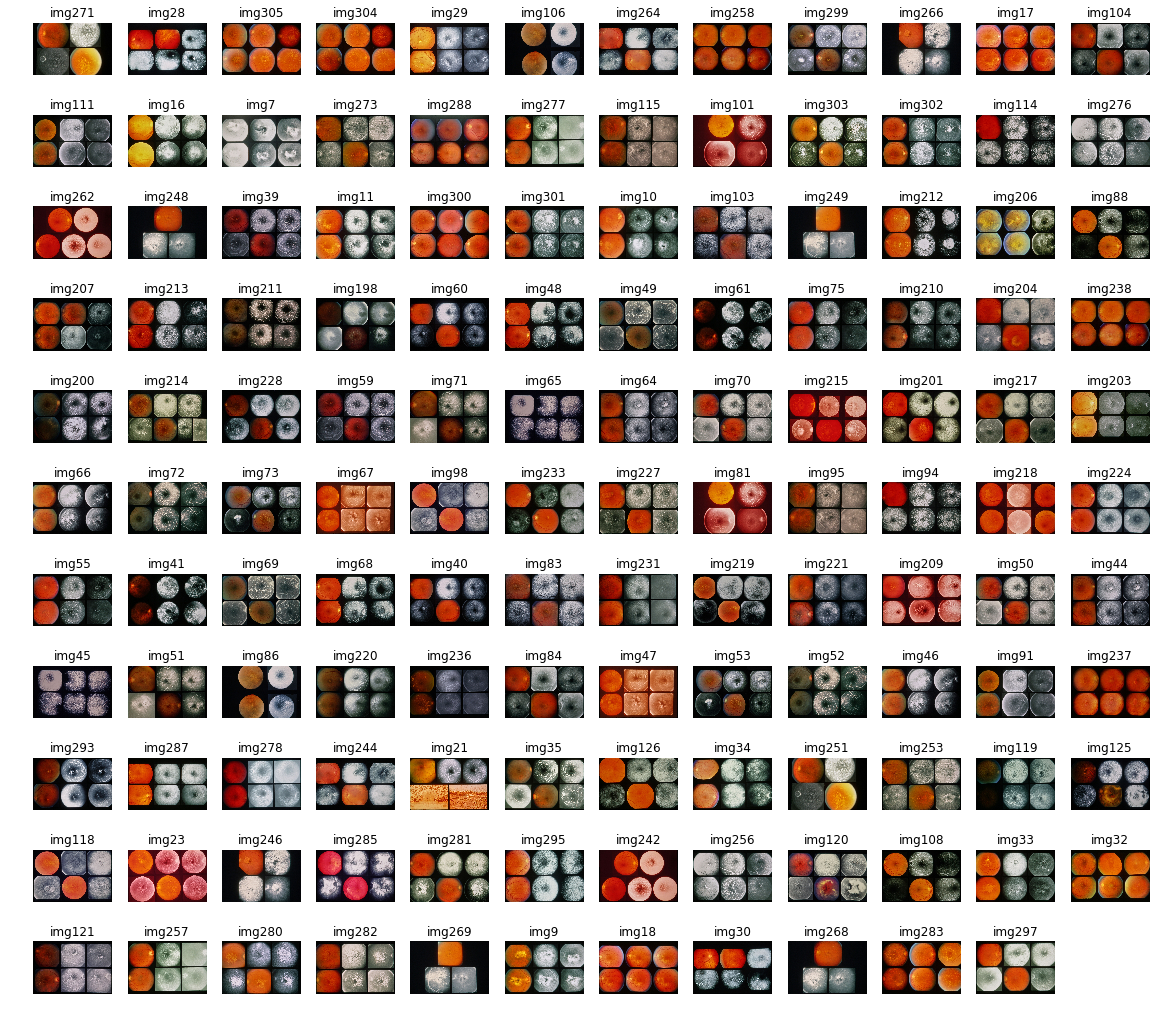

In [98]:
visualize(gen)

In [99]:
all_list = [[],
            [],
            [248, 249, 269, 268],
            [271, 106, 266, 101, 81, 86, 251, 246, 102, 225],
            [21, 242, 262, 36],
            [298, 223, 292, 294, 260, 199, 216, 208, 234, 291, 240]]
add_list = []
delete_list = []

for index,l in enumerate(all_list):
    if index+1 == clss:
        add_list += l
    else:
        delete_list += l

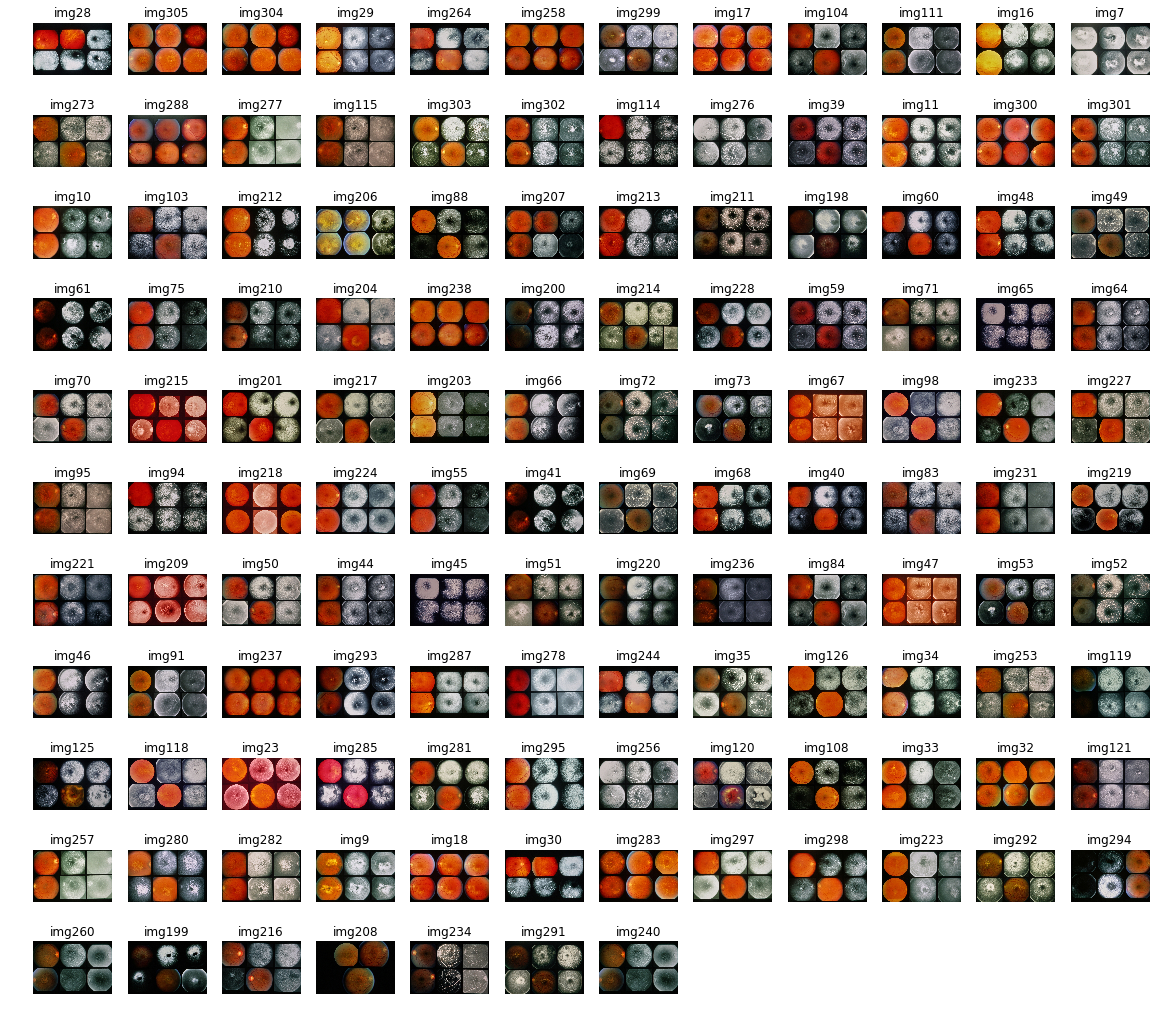

In [100]:
for img,i in gen.copy():
    if i in delete_list:
        gen.remove((img,i))
for i in add_list:
    gen.append(process(i))
visualize(gen)

In [101]:
final_gen[clss] = gen

In [107]:
final_gen[6]

[(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x1284DE978>,
  28),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x12536DDD8>,
  305),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x1284DE7B8>,
  304),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x12589DD68>,
  29),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x1276DFEF0>,
  264),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x1276DF4E0>,
  258),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x1276DF0F0>,
  299),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x1276DFD68>,
  17),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x1276DF668>,
  104),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x1284F2400>,
  111),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x125367CF8>,
  16),
 (<PIL.JpegIma

# Crop Function

In [132]:
def cut_save(x,y,w,h,im,img_path,i):
    region = im.crop((x, y, x+w, y+h))
    region.save(img_path.split('.')[0]+'-{}.jpg'.format(i))
    
    if os.path.exists(img_path.split('.')[0]+'.json'):
        src = img_path.split('.')[0]+'.json'
        dst = img_path.split('.')[0]+'-{}.json'.format(i)
        if src != dst:
            copyfile(src, dst)
    
def crop_2(img_path):
    if os.path.exists(img_path):
        im = Image.open(img_path)
        img_size = im.size
        w = img_size[0]/2.0
        h = img_size[1]

        cut_save(0,0,w,h,im,img_path,1)
        cut_save(w,0,w,h,im,img_path,2)

def crop_3(img_path):
    if os.path.exists(img_path):
        im = Image.open(img_path)
        img_size = im.size
        w = img_size[0]/2.0
        h = img_size[1]/2.0

        cut_save(0,0,2*w,h,im,img_path,1)
        cut_save(0,h,w,h,im,img_path,2)
        cut_save(w,h,w,h,im,img_path,3)    

def crop_4(img_path):
    if os.path.exists(img_path):
        im = Image.open(img_path)
        img_size = im.size
        w = img_size[0]/2.0
        h = img_size[1]/2.0

        cut_save(0,0,w,h,im,img_path,1)
        cut_save(w,h,w,h,im,img_path,2)
        cut_save(0,h,w,h,im,img_path,3)
        cut_save(w,0,w,h,im,img_path,4)    
    
def crop_5_up(img_path):
    if os.path.exists(img_path):
        im = Image.open(img_path)
        img_size = im.size
        w = img_size[0]/2.0
        h = img_size[1]/2.0
        w_3 = img_size[0]/3.0

        cut_save(0,0,w_3,h,im,img_path,1)
        cut_save(w_3,0,w_3,h,im,img_path,2)
        cut_save(w_3*2,0,w_3,h,im,img_path,3)
        cut_save(w,h,w,h,im,img_path,4)
        cut_save(0,h,w,h,im,img_path,5)

def crop_5_down(img_path):
    if os.path.exists(img_path):
        im = Image.open(img_path)
        img_size = im.size
        w = img_size[0]/2.0
        h = img_size[1]/2.0
        w_3 = img_size[0]/3.0

        cut_save(0,0,w,h,im,img_path,1)
        cut_save(w,0,w,h,im,img_path,2)
        cut_save(0,h,w_3,h,im,img_path,3)
        cut_save(w_3,h,w_3,h,im,img_path,4)
        cut_save(w_3*2,h,w_3,h,im,img_path,5)

def crop_6(img_path):
    if os.path.exists(img_path):
        im = Image.open(img_path)
        img_size = im.size
        w = img_size[0]/3.0
        h = img_size[1]/2.0

        cut_save(0,0,w,h,im,img_path,1)
        cut_save(w,0,w,h,im,img_path,2)
        cut_save(w*2,0,w,h,im,img_path,3)
        cut_save(0,h,w,h,im,img_path,4)
        cut_save(w,h,w,h,im,img_path,5)
        cut_save(w*2,h,w,h,im,img_path,6)

In [136]:
for img,ii in final_gen[2]:
    crop_2("eyenet_0819/Age-related-macular-degeneration/drusen/drusen-{}.jpg".format(ii))    

In [137]:
for img,ii in final_gen[2]:
    os.remove("eyenet_0819/Age-related-macular-degeneration/drusen/drusen-{}.jpg".format(ii))

In [134]:
final_gen[2]

[(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x1276A9BE0>,
  259),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x118A8C048>,
  76),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x130B19D30>,
  239),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x13C750470>,
  205),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x1276A9F60>,
  56),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x428 at 0x12181A6D8>,
  235),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x438 at 0x13181A3C8>,
  132)]